학습한 모델 checkpoint 불러와서 3D Sphereface 에 scatter plot 그리기


In [ ]:
from train_MsMalware import *
import torch
def get_embeds(model, loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device).eval()
    full_embeds = []
    full_labels = []
    with torch.no_grad():
        for i, (feats, labels) in enumerate(loader):
            feats = feats[:100].to(device)
            # feats = feats.permute(0,3,1,2)
            full_labels.append(labels[:100].cpu().detach().numpy())
            embeds = model(feats, embed=True)
            full_embeds.append(F.normalize(embeds.detach().cpu()).numpy())
    model = model.cpu()
    return np.concatenate(full_embeds), np.concatenate(full_labels)

In [ ]:
import matplotlib.pyplot as plt

def plot(embeds, labels, fig_path='./example.png'):

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    # Create a sphere
    r = 1
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
    x = r*sin(phi)*cos(theta)
    y = r*sin(phi)*sin(theta)
    z = r*cos(phi)
    ax.plot_surface(
        x, y, z,  rstride=1, cstride=1, color='w', alpha=0.3, linewidth=0)
    
    scatters=ax.scatter(embeds[:,0], embeds[:,1], embeds[:,2], c=labels,cmap=plt.cm.get_cmap('rainbow', 9), s=20)
    
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    # ax.legend()
    # ax.set_aspect("equal")
    # 
    # plt.legend(handles=scatters,labels=['Ramnit','Lollipop','Kelihos_ver3','Vundo','Simda','Tracur','Kelihos_ver1','Obfuscator.ACY','Gatak']) ## 범례
    plt.tight_layout()
    plt.savefig(fig_path)

In [ ]:
train_ds = MsMalwareDataset( x_root='../../data/X_byte_image.npy',
                            y_root='../../data/Y.csv')
                        

example_loader = torch.utils.data.DataLoader(dataset=train_ds,
                                            batch_size=64,
                                            shuffle=False)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


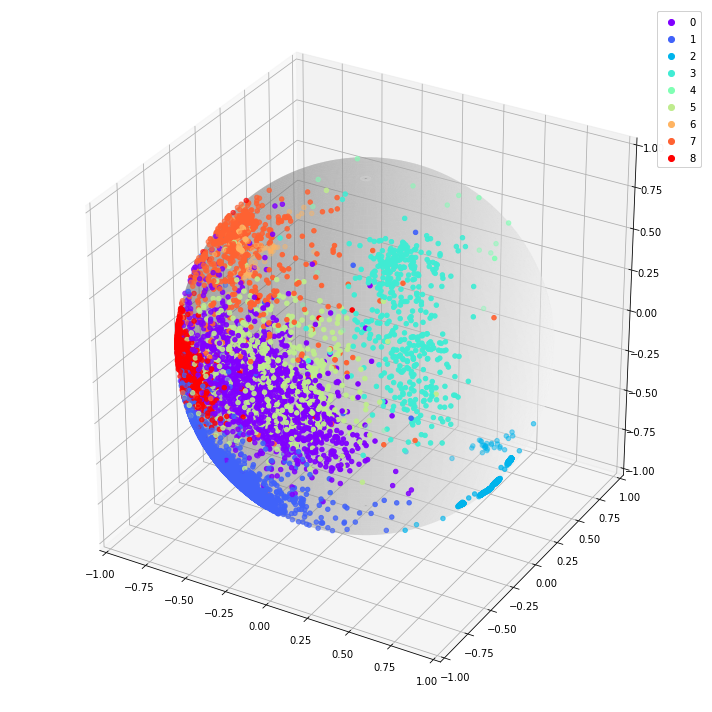

In [ ]:
from train_MsMalware import *
model_baseline = ConvBaseline()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_baseline.parameters(), lr=0.01)
checkpoint = torch.load('./basemodel_31.pt')
model_baseline.load_state_dict(checkpoint['model_state_dict'])

bl_embeds, bl_labels = get_embeds(model_baseline, example_loader)
plot(bl_embeds, bl_labels, fig_path='./MsFigs/baseline.png')